In [1]:
# Realizar as importações
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
import cv2

In [65]:
# Funções úteis

def mostrar(image : np.ndarray, cmap1 = None, title = "Imagem", orig : np.ndarray = None, cmap2 = None):

    if orig is not None:
        plt.figure(figsize=(20,10))
        plt.subplot(1,2,2)
        plt.imshow(orig, cmap=cmap2)
        plt.title(title + " Original")
        plt.axis('off')
        plt.subplot(1,2,1)
        plt.imshow(image, cmap=cmap1)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        plt.figure(figsize=(10,10))
        plt.imshow(image, cmap=cmap1)
        plt.title(title)
        plt.axis('off')
        plt.show()

def mostrar_histograma(image : np.ndarray, title = "Histograma", orig : np.ndarray = None):
    if orig is not None:
        plt.figure(figsize=(20,10))
        plt.subplot(1,2,2)
        plt.hist(orig.ravel(), bins=256, range=(0, 256))
        plt.xlim([-1, np.max(orig) + 10])
        plt.title(title + " Original")
        plt.subplot(1,2,1)
        plt.hist(image.ravel(), bins=256, range=(0, 256))
        plt.xlim([-1, np.max(image) + 10])
        plt.title(title)
        plt.show()
    else:
        plt.hist(image.ravel(), bins=256, range=(0, 256))
        plt.title(title)
        plt.xlim([-1, np.max(image) + 10])
        plt.show()

def conv_escala(image : np.ndarray) -> np.ndarray:
    min = np.min(image)
    max = np.max(image)
    print("min: ", min)
    print("max: ", max)
    image = ((image - min) * 255) // (max - min)
    min = np.min(image)
    max = np.max(image)
    print("min: ", min)
    print("max: ", max)
    return image

# 1.1 - Esboço a Lápis

Implementar um efeito de esboço a l apis em uma imagem por meio dos seguintes passos: 
(i)converter a imagem colorida para níveis de cinza,
(ii) aplicar um filtro de desfoque gaussiano,(por exemplo, com uma máscara de 21×21 pixels) para suavizar os detalhes da imagem,
(iii) dividir a imagem em tons de cinza pela versão desfocada para realçar os contornos

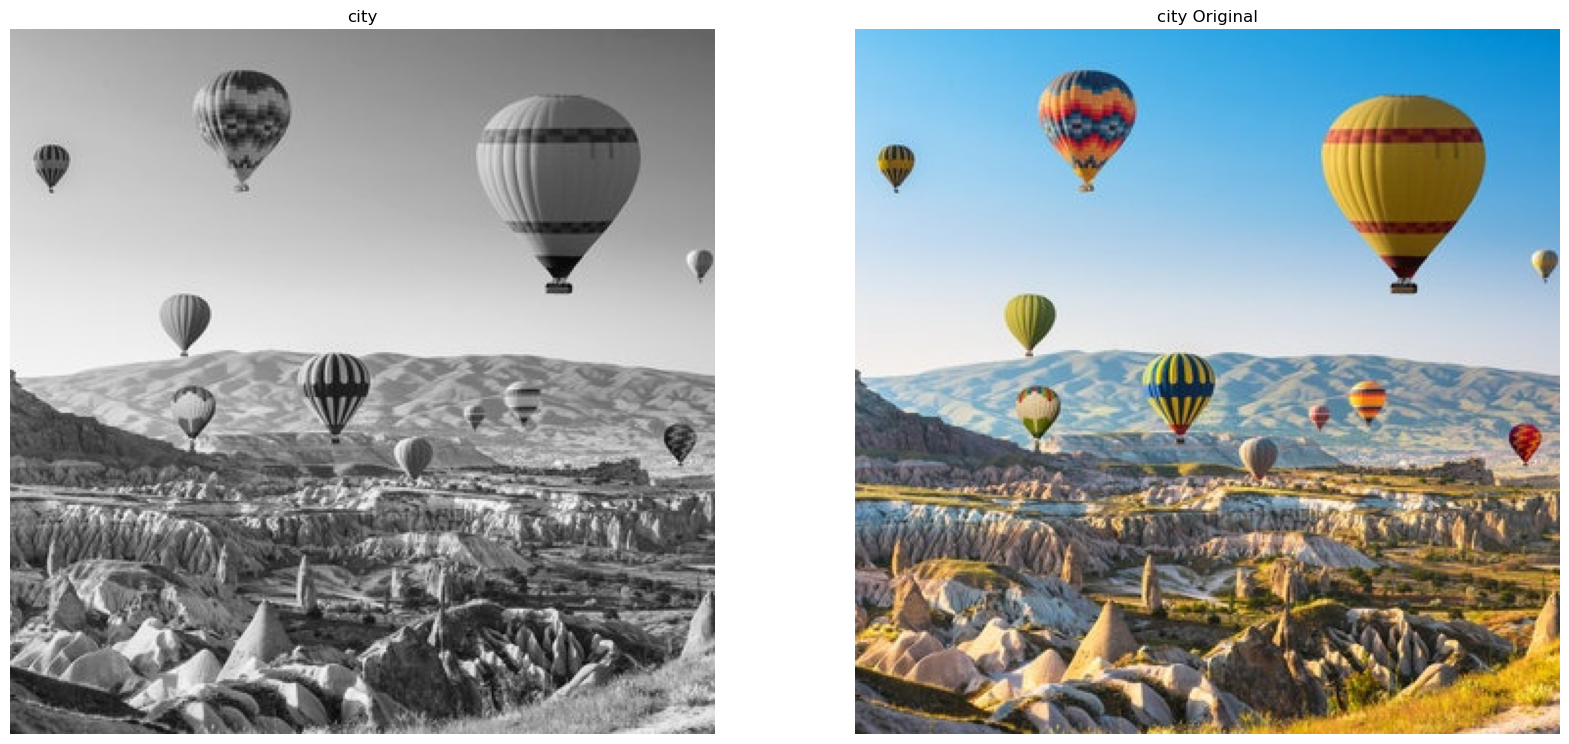

In [80]:
nome = 'capadocia'
imagem = cv2.imread('../images/' + nome + '.png', cv2.IMREAD_COLOR)
imagem_orig = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
imagem_gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
imagem_orig = imagem_orig.astype(np.int16)
imagem_gray = imagem_gray.astype(np.int16)
mostrar(imagem_gray, title= 'city', orig=imagem_orig, cmap1='gray')

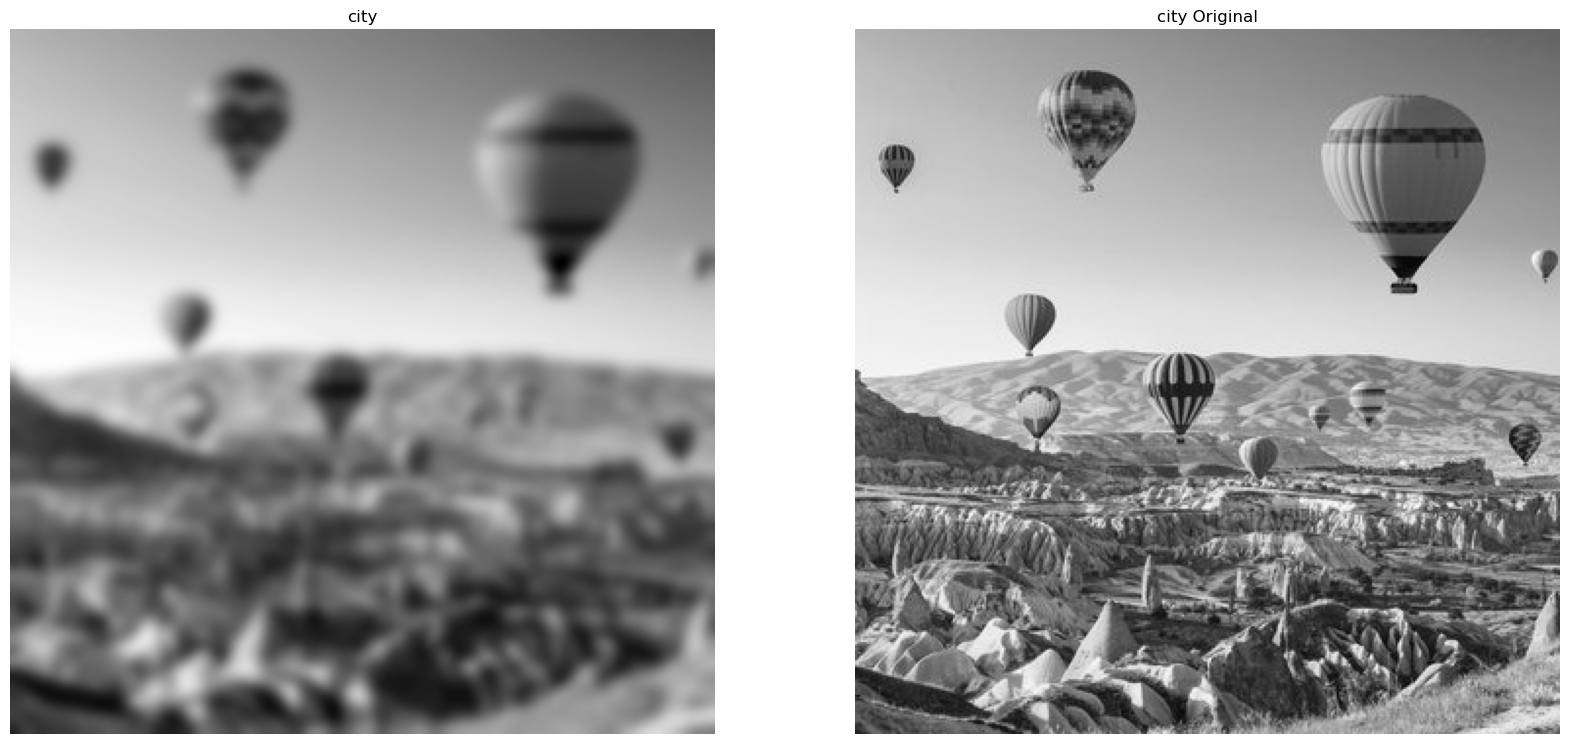

In [81]:
t_mask = 21
imagem_desfocada= cv2.GaussianBlur(imagem_gray, (t_mask, t_mask), 0, borderType=cv2.BORDER_REFLECT)
imagem_gray[imagem_gray == 0] = 1
imagem_desfocada[imagem_desfocada == 0] = 1
mostrar(imagem_desfocada, title= 'city', orig=imagem_gray, cmap1='gray', cmap2='gray')

[0.03759398 0.04166667 0.04494382 ... 2.62025316 2.62195122 2.66101695]
min:  0.03759398496240601
max:  2.6610169491525424
min:  0.0
max:  255.0
[  0   1   2   3   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211

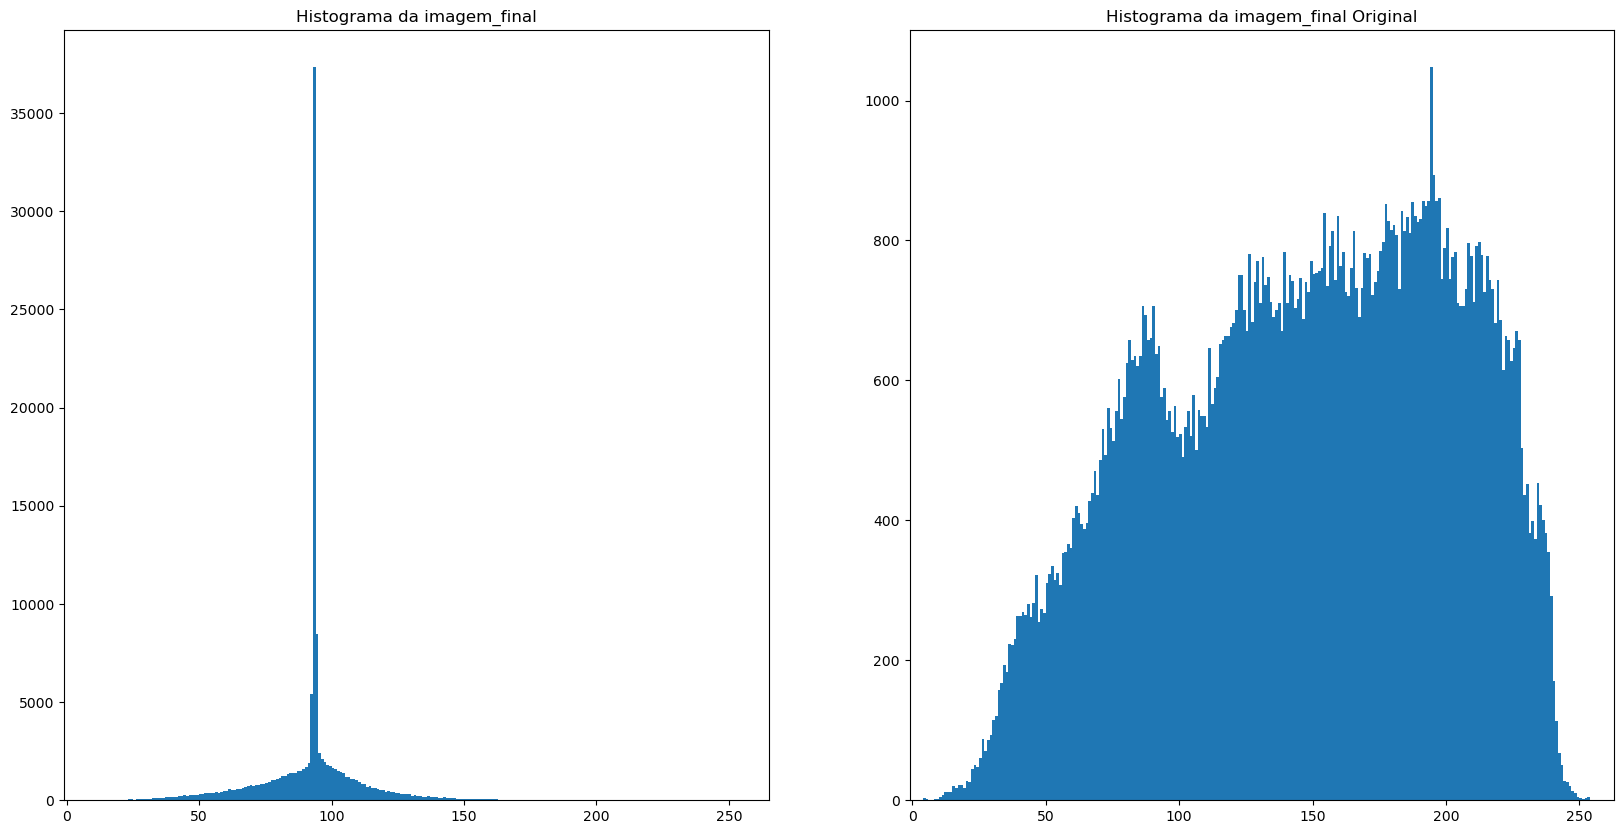

min:  30
max:  92
min:  0
max:  255


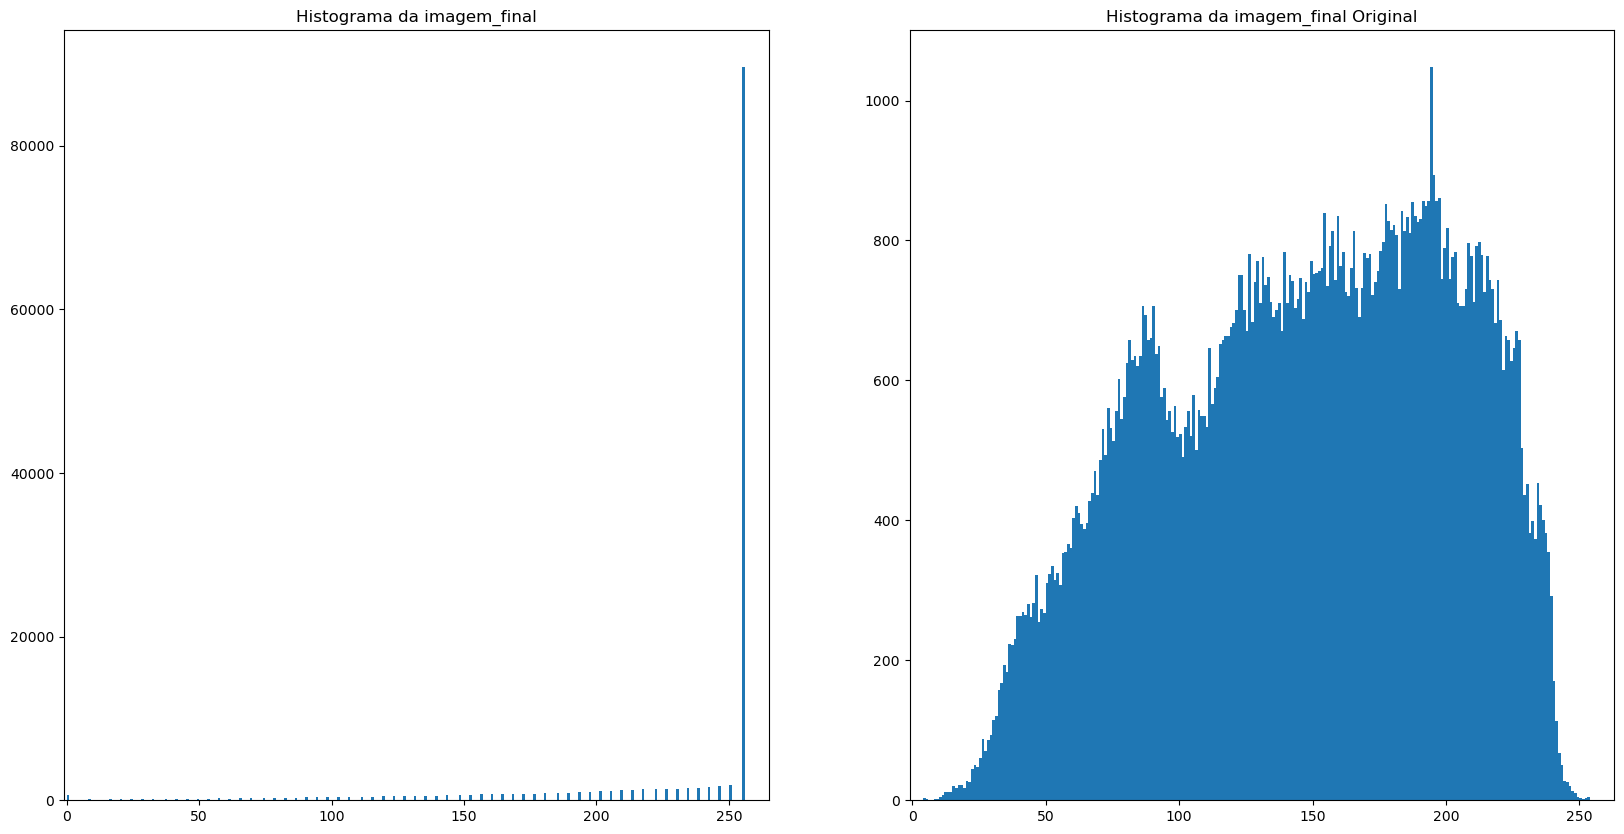

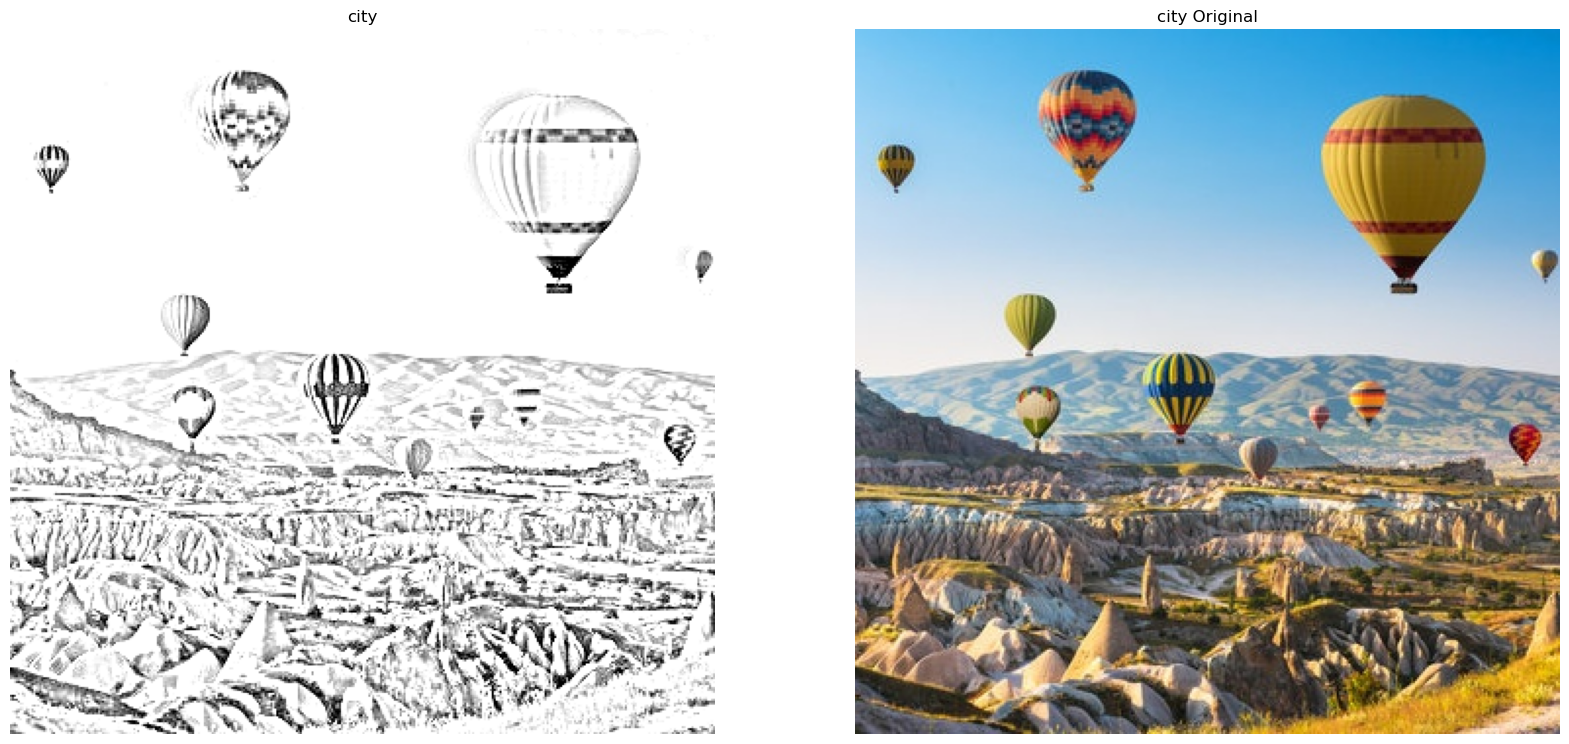

In [89]:
imagem_final = imagem_gray / imagem_desfocada

print(np.unique(imagem_final))

imagem_final = conv_escala(imagem_final)
imagem_final = imagem_final.astype(np.uint16)
print(np.unique(imagem_final))
mostrar_histograma(imagem_final, title= 'Histograma da imagem_final', orig=imagem_gray)

imagem_final = np.clip(imagem_final, 30, 92) #watch 10, 40
imagem_final = conv_escala(imagem_final)
mostrar_histograma(imagem_final, title= 'Histograma da imagem_final', orig=imagem_gray)

mostrar(imagem_final, title= 'city', orig=imagem_orig, cmap1='gray')